### 손실 검증

In [2]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)

##### 손실 곡선

In [3]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input,train_target), (test_input,test_target)= keras.datasets.fashion_mnist.load_data()

train_scaled=train_input/255.0

train_scaled, val_scaled, train_target, val_target =train_test_split(
    train_scaled,train_target,test_size=0.2, random_state=42
)

In [9]:
# 이미지를 평탄화하고, 100개의 뉴런을 가진 은닉층, 10개의 클래스를 분류하는 출력층을 정의하는 함수
def model_fn(a_layer=None):
    model=keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100,activation='relu'))
    
    if a_layer: # layer가 있으면 layer를 추가
        model.add(a_layer)
    model.add(keras.layers.Dense(10,activation='softmax'))
    return model

In [10]:
# 모델을 넘겨주고 요약 출력 예시
model=model_fn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


In [13]:
# 일반 모델 학습
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=5, verbose=0)

In [14]:
# history에는 뭐가 있을까
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


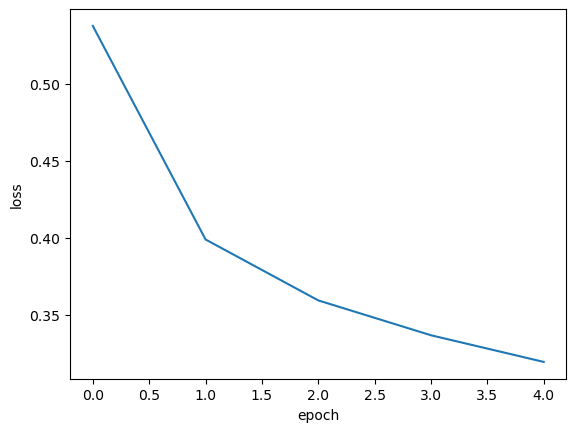

In [15]:
# epoch에 따른 loss값 출력
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [16]:
# epoch 수를 20으로 늘려서 재훈련
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=20, verbose=0)

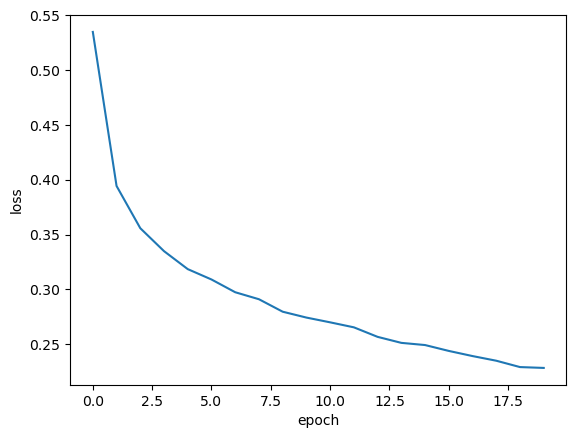

In [17]:
# epoch에 따른 loss값 출력
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [18]:
## 검증 손실
# 신경망의 최적화 대상은 정확도가 아니라 '손실함수'(손실값)
# 손실 감소에 비례하여 정확도가 높아지지 않는 경우도 있음(오버,언더피팅)

In [19]:
# validation score 출력
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')

history=model.fit(train_scaled,train_target,epochs=20, verbose=0,
                  validation_data=(val_scaled,val_target))

In [20]:
# history에는 뭐가 있음?
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


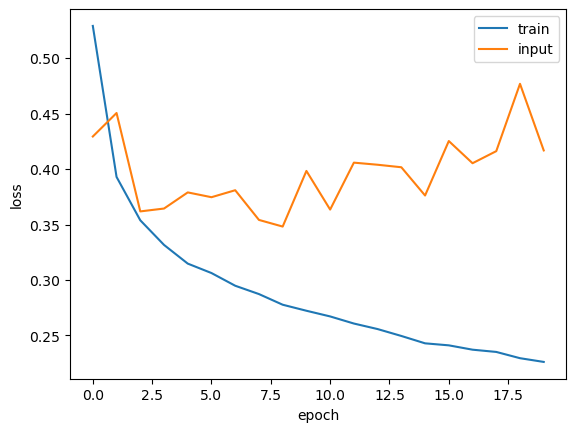

In [22]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','input'])
plt.show()



In [ ]:
# 훈련 손실은 꾸준이 감소하기 때문에 에폭이 너무 많으면 과대적합 발생
# 만약 , 검증 데이터에 대한 손실이 상승하는 시점을 최대한 늦추면 검증셋 손실이 줄어듦
# 이때 사용하는 것이 opimizer